In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
data.shape

(20058, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [11]:
data['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

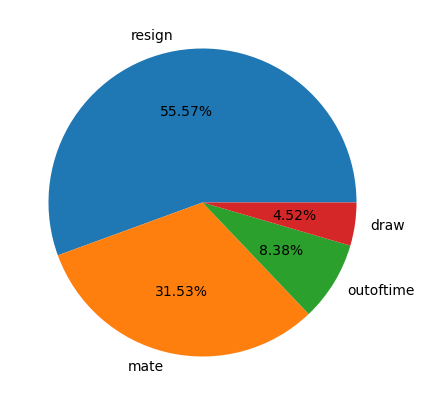

In [14]:
result = data['victory_status'].value_counts()
plt.figure(figsize=(8,5))
plt.pie(result, labels= result.keys(), autopct="%.2f%%", radius=1)
plt.show()

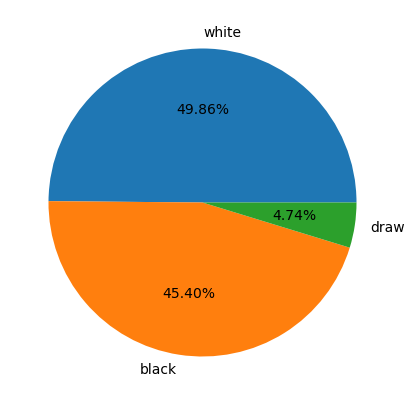

In [15]:
result = data['winner'].value_counts()
plt.figure(figsize=(8,5))
plt.pie(result, labels= result.keys(), autopct="%.2f%%", radius=1)
plt.show()

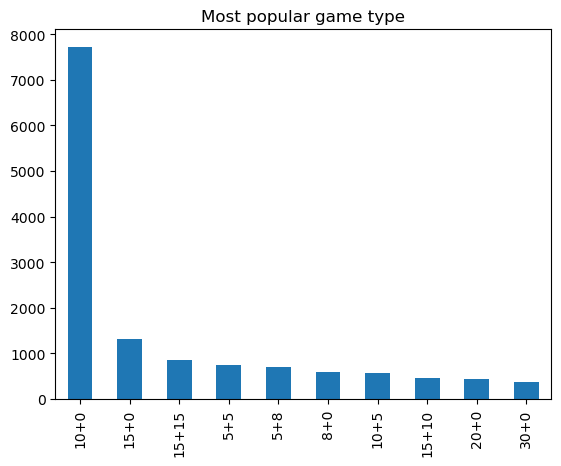

In [27]:
game_type = data['increment_code'].value_counts().head(10)
game_type.plot(kind='bar', title = 'Most popular game type')
plt.show()

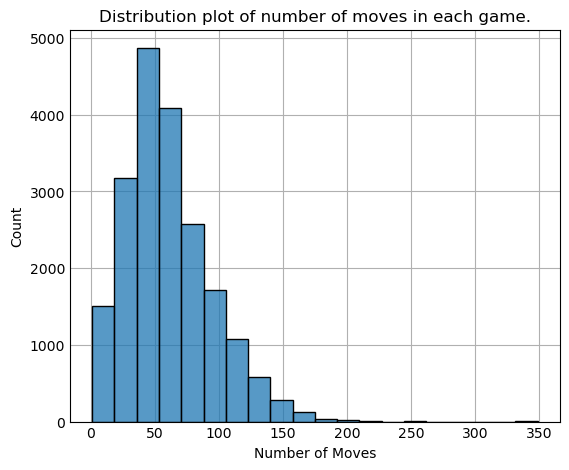

In [75]:
plt.figure(figsize=(5,4))
sns.histplot(data=data, x = 'turns', bins=20)
plt.title('Distribution plot of number of moves in each game.')
plt.xlabel('Number of Moves')
plt.show()

### What most frequent opening move played by white and black?

In [92]:
white_first = []
black_first = []

for move in data['moves']:
    if len(move.split(' ')) >=2:
        white_first.append(move.split(' ')[0])
        black_first.append(move.split(' ')[1])

In [93]:
dict_move = {'White': white_first, 'Black': black_first}

first_move = pd.DataFrame(dict_move)
first_move

,White,Black
0,d4,d5
1,d4,Nc6
2,e4,e5
3,d4,d5
4,e4,e5
...,...,...
20035,d4,f5
20036,d4,d6
20037,d4,d5
20038,e4,d6


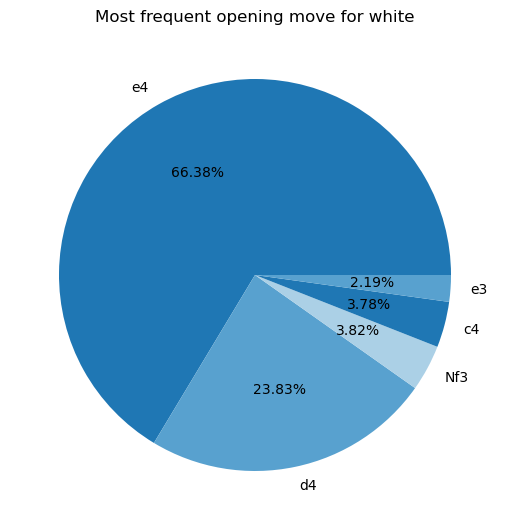

In [100]:
move = first_move['White'].value_counts().head(5)

plt.figure(figsize=(8,5))
plt.pie(move, labels= move.keys(), autopct="%.2f%%", radius=1)
plt.title('Most frequent opening move for white')
plt.show()

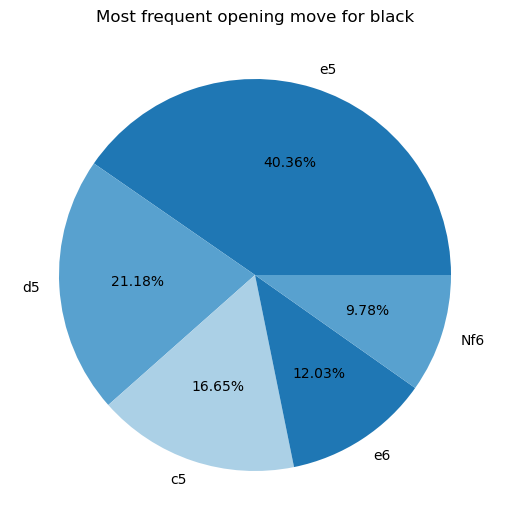

In [101]:
move = first_move['Black'].value_counts().head(5)

plt.figure(figsize=(8,5))
plt.pie(move, labels= move.keys(), autopct="%.2f%%", radius=1)
plt.title('Most frequent opening move for black')
plt.show()

### Most checkmate done by?

In [143]:
check_mate_game = data[data['victory_status'] == 'mate']

last_moves = []
for move in check_mate_game['moves']:
    last_move = move.split(" ")[-1]
    if last_move[-1]=="#":
        try:
            piece = [i for i in last_move if i.isupper()]
            last_moves.append(piece[0])
        except:
            last_moves.append('Pawn')
    else:
        last_moves.append('NA')

C:\Users\VAISHNAV\AppData\Local\Temp\ipykernel_2348\4137519789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_mate_game['last_move'] = last_moves


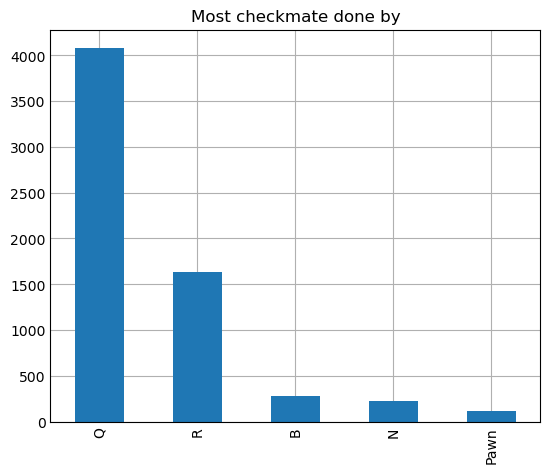

In [144]:
check_mate_game['last_move'] = last_moves

plt.figure(figsize=(5,4))
check_mate_game['last_move'].value_counts().head(5).plot(kind='bar')
plt.title('Most checkmate done by')
plt.show()

In [145]:
### Most popular opening played in game

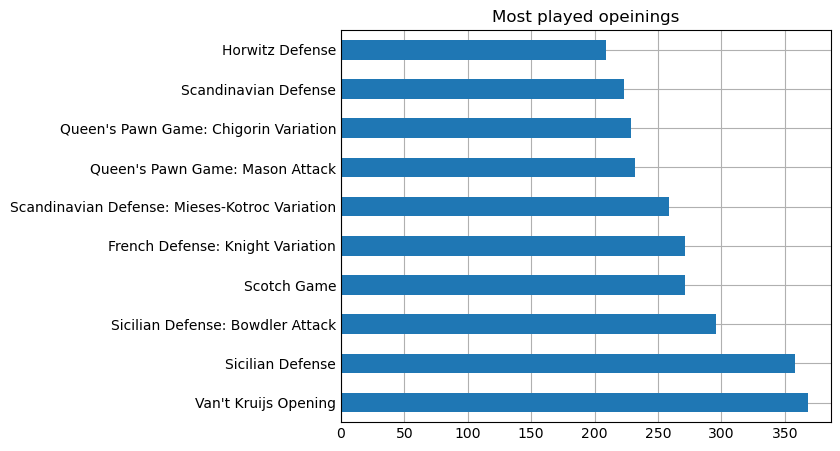

In [149]:
plt.figure(figsize=(5,4))
data['opening_name'].value_counts().head(10).plot(kind='barh')
plt.title('Most played opeinings')
plt.show()

### Which is the longest opening played?

In [153]:
data[data['opening_ply'] == data['opening_ply'].max()]['opening_name']

4475     Ruy Lopez: Marshall Attack |  Modern Main Line
16443    Ruy Lopez: Marshall Attack |  Modern Main Line
17900    Ruy Lopez: Marshall Attack |  Modern Main Line
19412    Ruy Lopez: Marshall Attack |  Modern Main Line
Name: opening_name, dtype: object

In [155]:
data['opening_ply'].max()

28